**OBJECTIVE**


How have Dutch house prices evolved from 1995, and how do trends differ across national, macroregional, provincial, and municipal levels?


Where have Dutch house prices grown the fastest between 1995 and 2024?

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



In [ ]:
# Loading dataset from source
df = pd.read_csv("housing.csv",sep=';')

# Data inspection
print(df.shape)
display(df.head(20))
display(df.info())

(22350, 4)


,ID,Regions,Periods,AveragePurchasePrice_1
0,0,NL01,1995JJ00,93750.0
1,1,NL01,1996JJ00,102607.0
2,2,NL01,1997JJ00,113163.0
3,3,NL01,1998JJ00,124540.0
4,4,NL01,1999JJ00,144778.0
5,5,NL01,2000JJ00,172050.0
6,6,NL01,2001JJ00,188397.0
7,7,NL01,2002JJ00,199752.0
8,8,NL01,2003JJ00,204829.0
9,9,NL01,2004JJ00,212723.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22350 entries, 0 to 22349
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      22350 non-null  int64  
 1   Regions                 22350 non-null  object 
 2   Periods                 22350 non-null  object 
 3   AveragePurchasePrice_1  13918 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 698.6+ KB


None

*Creating required additional columns and cleaning data*

In [ ]:
# converting periods column to int by creating new 'Year' column
df['Year']=df['Periods'].str[:4].astype(int)


# Dropping spaces from Regions codes
df['Regions'] = df['Regions'].str.strip()


# classifying regions and creating a new column 'Region_type'
region_types = []

for x in df["Regions"]:
    if x.startswith("NL"):
        region_types.append("National")
    elif x.startswith("LD"):
        region_types.append("MacroRegion")
    elif x.startswith("PV"):
        region_types.append("Province")
    elif x.startswith("GM"):
        region_types.append("Municipality")
    else:
        region_types.append("Other")

df["Region_type"] = region_types
print(df["Region_type"].value_counts())


# Checking for missing data
print(df.isna().sum())


# Categorizing missingness by Region_type
print(df.groupby("Region_type")["AveragePurchasePrice_1"].apply(lambda x: x.isna().mean()))


# Removing rows where price is missing (Municipality level data)
df['AveragePurchasePrice_1'].isna().sum()
df = df.dropna(subset=['AveragePurchasePrice_1']).reset_index(drop=True)


# Rechecking for missing data and new columns
print(df.isna().sum())
print(df.head())


Region_type
Municipality    21840
Province          360
MacroRegion       120
National           30
Name: count, dtype: int64
ID                           0
Regions                      0
Periods                      0
AveragePurchasePrice_1    8432
Year                         0
Region_type                  0
dtype: int64
Region_type
MacroRegion     0.000000
Municipality    0.386081
National        0.000000
Province        0.000000
Name: AveragePurchasePrice_1, dtype: float64
ID                        0
Regions                   0
Periods                   0
AveragePurchasePrice_1    0
Year                      0
Region_type               0
dtype: int64
   ID Regions   Periods  AveragePurchasePrice_1  Year Region_type
0   0    NL01  1995JJ00                 93750.0  1995    National
1   1    NL01  1996JJ00                102607.0  1996    National
2   2    NL01  1997JJ00                113163.0  1997    National
3   3    NL01  1998JJ00                124540.0  1998    National
4   4  

*National Housing Price Trend (1995–2024)*

Year
1995     93750.0
1996    102607.0
1997    113163.0
1998    124540.0
1999    144778.0
2000    172050.0
2001    188397.0
2002    199752.0
2003    204829.0
2004    212723.0
2005    222706.0
2006    235843.0
2007    248325.0
2008    254918.0
2009    238259.0
2010    239530.0
2011    240059.0
2012    226661.0
2013    213353.0
2014    222218.0
2015    230194.0
2016    243837.0
2017    263295.0
2018    287267.0
2019    307978.0
2020    334488.0
2021    386714.0
2022    428591.0
2023    416153.0
2024    450985.0
Name: AveragePurchasePrice_1, dtype: float64
Year
1995          NaN
1996     9.447467
1997    10.287797
1998    10.053639
1999    16.250201
2000    18.837116
2001     9.501308
2002     6.027166
2003     2.541652
2004     3.853946
2005     4.692958
2006     5.898808
2007     5.292504
2008     2.654988
2009    -6.535043
2010     0.533453
2011     0.220849
2012    -5.581128
2013    -5.871323
2014     4.155086
2015     3.589268
2016     5.926740
2017     7.979921
2018     9.104616
201

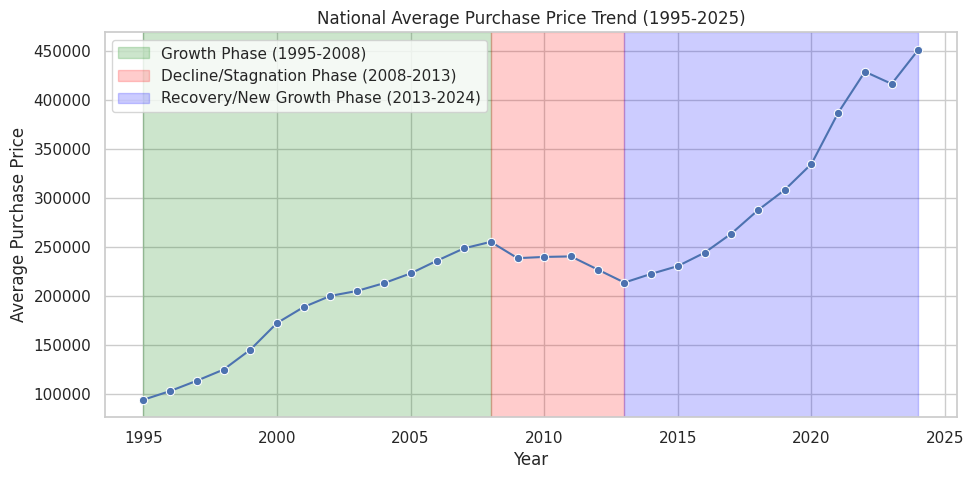

Turning points:
2008: €254,918
2009: €238,259
2010: €239,530
2011: €240,059
2012: €226,661
2013: €213,353
2014: €222,218
2022: €428,591
2023: €416,153


In [ ]:
# National yearly average price (nl_avg_price)
nl_avg_price = df[df['Region_type'] == 'National'].groupby('Year')['AveragePurchasePrice_1'].mean().sort_index()
print(nl_avg_price)

# Year on Year % Change in National yearly average price (nl_pct_change)
nl_pct_change = nl_avg_price.pct_change() * 100
print(nl_pct_change)

# Calculating average yearly increase
avg_increase = nl_avg_price.diff().mean()
print(f"Average yearly increase: €{avg_increase:,.0f}")

# How many times the average price has increased from 1995 to current
manifold_increase = (nl_avg_price.iloc[-1] - nl_avg_price.iloc[0]) / nl_avg_price.iloc[0]
print(f"The national average price increased by {manifold_increase:.2f}times from {nl_avg_price.index[0]} to {nl_avg_price.index[-1]}")

# Year with highest price (peak) & lowest price (trough)
peak_year = nl_avg_price.idxmax()
trough_year = nl_avg_price.idxmin()
peak_price = nl_avg_price.max()
trough_price = nl_avg_price.min()
print(f"The highest price was recorded in {peak_year} with a value of {peak_price:.2f} and the lowest price was recorded in {trough_year} with a value of {trough_price:.2f}")

# Years with slow avg price growth
diff = nl_avg_price.diff()
flat_years = diff[diff < 5000].dropna().sort_index()
print(f"Years with slow price growth: {flat_years}")

# National price trend line chart
plt.figure(figsize=(11,5))
sns.lineplot(data=nl_avg_price.reset_index(), x='Year', y='AveragePurchasePrice_1', marker='o')
plt.title('National Average Purchase Price Trend (1995-2025)')
plt.xlabel('Year')
plt.ylabel('Average Purchase Price')
plt.axvspan(1995, 2008, color='green', alpha=0.2, label='Growth Phase (1995-2008)')
plt.axvspan(2008, 2013, color='red', alpha=0.2, label='Decline/Stagnation Phase (2008-2013)')
plt.axvspan(2013, 2024, color='blue', alpha=0.2, label='Recovery/New Growth Phase (2013-2024)')
plt.legend()
plt.show()

# Turning points in National price trend data
turning_points = []
for i in range(2, len(nl_avg_price) - 1):
    prev0 = nl_avg_price.iloc[i - 2]
    prev = nl_avg_price.iloc[i - 1]
    curr = nl_avg_price.iloc[i]
    next = nl_avg_price.iloc[i + 1]
    year = nl_avg_price.index[i]
    if (curr > next) or (curr < prev) or (curr<prev0):
        year = nl_avg_price.index[i]
        turning_points.append((year, curr))
print("Turning points:")
for year, price in turning_points:
    print(f"{year}: €{price:,.0f}")



*Macroregion comparison (LD01–LD04)*

     Year Regions  AveragePurchasePrice_1
0    1995    LD01                 72907.0
1    1995    LD02                 94927.0
2    1995    LD03                 96079.0
3    1995    LD04                 98449.0
4    1996    LD01                 78744.0
..    ...     ...                     ...
115  2023    LD04                393373.0
116  2024    LD01                356207.0
117  2024    LD02                426882.0
118  2024    LD03                488736.0
119  2024    LD04                428252.0

[120 rows x 3 columns]


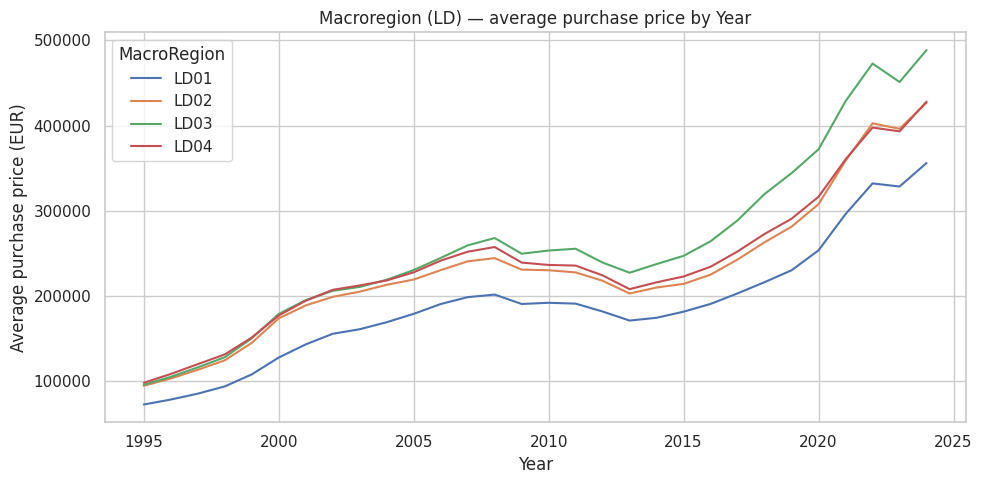

In [ ]:
# Comparing the four Macroregions
ld = df.loc[df['Region_type'] == 'MacroRegion'].groupby(['Year','Regions'],as_index=False)['AveragePurchasePrice_1'].mean()
print(ld)

# Displaying the data on a line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=ld,x="Year",y="AveragePurchasePrice_1",hue="Regions")
plt.title('Macroregion (LD) — average purchase price by Year')
plt.ylabel('Average purchase price (EUR)')
plt.xlabel('Year')
plt.legend(title='MacroRegion', loc='upper left')
plt.tight_layout()
plt.show()

*Province-level Analysis*

2024
   Regions  AveragePurchasePrice_1
0     PV27                544917.0
1     PV26                526771.0
2     PV30                456420.0
3     PV25                446181.0
4     PV28                442913.0
5     PV24                422630.0
6     PV23                393428.0
7     PV22                380809.0
8     PV31                357532.0
9     PV21                350624.0
10    PV29                345402.0
11    PV20                339874.0


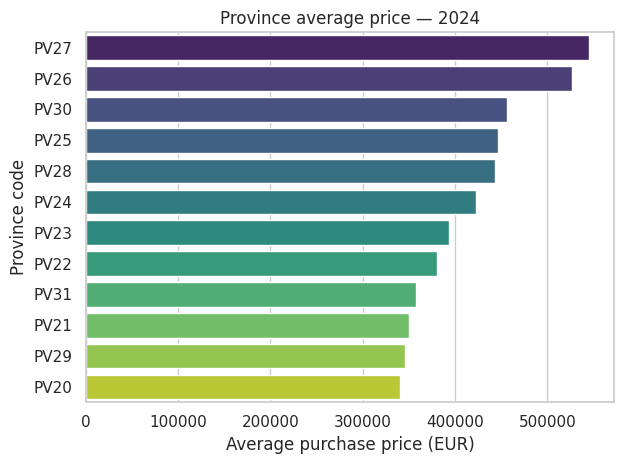

  Regions  first_year  first_price  last_year  last_price  pct_change  years  \
7    PV27        1995     101308.0       2024    544917.0  437.881510     29   
1    PV21        1995      67992.0       2024    350624.0  415.684198     29   
0    PV20        1995      67913.0       2024    339874.0  400.454994     29   
8    PV28        1995      90469.0       2024    442913.0  389.574329     29   
6    PV26        1995     109909.0       2024    526771.0  379.279222     29   

       cagr  
7  0.059732  
1  0.058193  
0  0.057100  
8  0.056299  
6  0.055525  


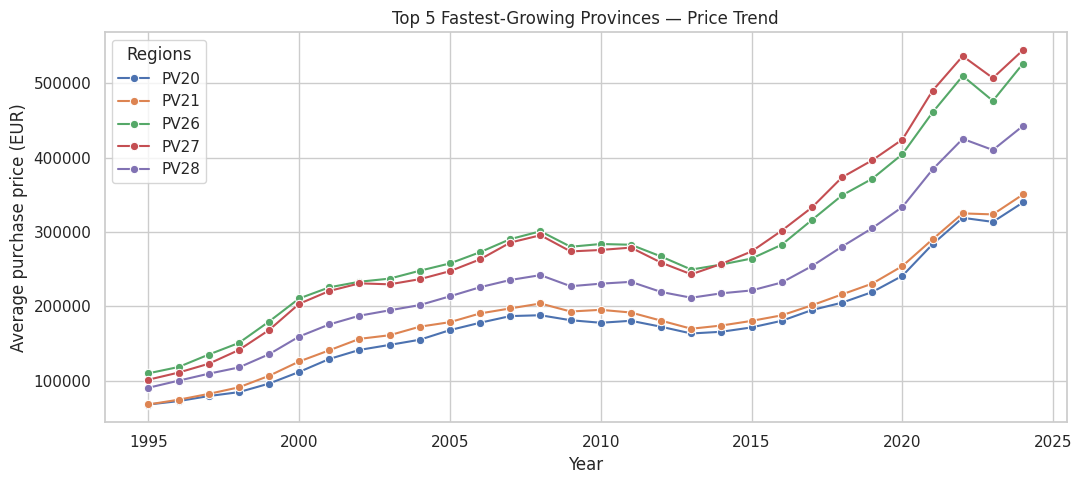

Most volatile provinces:
   Regions           mean            std  count
7     PV27  287633.566667  119487.443226     30
6     PV26  285156.033333  107196.506613     30
8     PV28  233954.500000   91790.484585     30
10    PV30  253107.000000   87774.146605     30
4     PV24  214188.966667   86643.384602     30

Least volatile provinces:
   Regions           mean           std  count
2     PV22  203149.166667  73603.881083     30
9     PV29  192177.466667  70887.733694     30
1     PV21  187168.266667  70717.536370     30
0     PV20  177264.433333  69743.511751     30
11    PV31  201438.700000  64034.632143     30


In [ ]:
# choosing latest year available in province rows
latest_year = df.loc[df["Region_type"] == "Province","Year"].max()
print(latest_year)

# In the latest year, which provinces (regions) have the highest average purchase price?
prov_latest = (
    df.loc[(df["Region_type"] == "Province") & (df["Year"]== latest_year)]
    .groupby("Regions",as_index=False)['AveragePurchasePrice_1'].mean()
    .sort_values('AveragePurchasePrice_1',ascending=False)
    .reset_index(drop=True)
)
print(prov_latest)

# plotting a bar chart for province avg. prices in latest year
sns.barplot(data=prov_latest, x='AveragePurchasePrice_1', y='Regions', palette='viridis', hue='Regions',legend=False)
plt.title(f'Province average price — {latest_year}')
plt.xlabel('Average purchase price (EUR)')
plt.ylabel('Province code')
plt.tight_layout()
plt.show()

# Calculating % growth and CAGR for provinces
prov_avg = df.loc[df['Region_type']=='Province'].groupby(['Year','Regions'], as_index=False)['AveragePurchasePrice_1'].mean()

first = prov_avg.groupby('Regions').first().reset_index()
last = prov_avg.groupby('Regions').last().reset_index()

summary = pd.DataFrame()
summary ['Regions'] = first['Regions']
summary['first_year'] = first['Year']
summary['first_price'] = first['AveragePurchasePrice_1']
summary['last_year'] = last['Year']
summary['last_price'] = last['AveragePurchasePrice_1']

summary['pct_change'] = (summary['last_price'] - summary['first_price']) / summary['first_price'] * 100
summary['years'] = summary['last_year'] - summary['first_year']
summary['cagr'] = (summary['last_price'] / summary['first_price'])**(1 / summary['years']) - 1

summary = summary.sort_values('pct_change', ascending=False)
print(summary.head())
top5_growth = summary.nlargest(5, 'pct_change')['Regions']

# plotting a line chart to show price trend for top 5 fastest growing province
plt.figure(figsize=(11,5))
sns.lineplot(data=prov_avg[prov_avg['Regions'].isin(top5_growth)],
             x='Year', y='AveragePurchasePrice_1', hue='Regions', marker='o')
plt.title('Top 5 Fastest-Growing Provinces — Price Trend')
plt.ylabel('Average purchase price (EUR)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# calculating Province volatility (year-to-year std dev) & most/least stable
prov_vol = prov_avg.groupby('Regions')['AveragePurchasePrice_1'].agg(['mean', 'std', 'count']).reset_index()
prov_vol = prov_vol.sort_values('std', ascending=False) #the top rows have highest volatility, bottom rows are most stable
most_volatile = prov_vol.head(5)
most_stable   = prov_vol.tail(5)

print("Most volatile provinces:")
print(most_volatile)

print("\nLeast volatile provinces:")
print(most_stable)

*Municipality level analysis*



Snapshot year: 1995


,Regions,AveragePurchasePrice_1
399,GM0629,231781.0
264,GM0377,229045.0
263,GM0376,224507.0
286,GM0417,206969.0
398,GM0628,197726.0
261,GM0373,185870.0
525,GM0837,178287.0
233,GM0330,176866.0
215,GM0305,174475.0
192,GM0277,173798.0


,Regions,AveragePurchasePrice_1
617,GM1661,44163.0
430,GM0704,51116.0
466,GM0765,51742.0
30,GM0068,52506.0
616,GM1651,53025.0
27,GM0063,53483.0
20,GM0052,56026.0
35,GM0080,56599.0
432,GM0710,56820.0
82,GM0140,57983.0


,Regions,first_year,first_price,last_year,last_price,pct_change
304,GM0457,1995,79917.0,2022,537554.0,572.640364
271,GM0392,1995,83039.0,2024,548843.0,560.946061
255,GM0363,1995,98008.0,2024,617647.0,530.200596
40,GM0086,1995,70909.0,2024,433883.0,511.887067
242,GM0344,1995,85568.0,2024,519924.0,507.614996
335,GM0518,1995,74053.0,2024,447417.0,504.184841
5,GM0014,1995,62635.0,2024,373411.0,496.169873
376,GM0599,1995,67793.0,2024,402854.0,494.241293
254,GM0362,1995,110371.0,2024,649823.0,488.762447
180,GM0262,1995,95575.0,2024,547513.0,472.862150


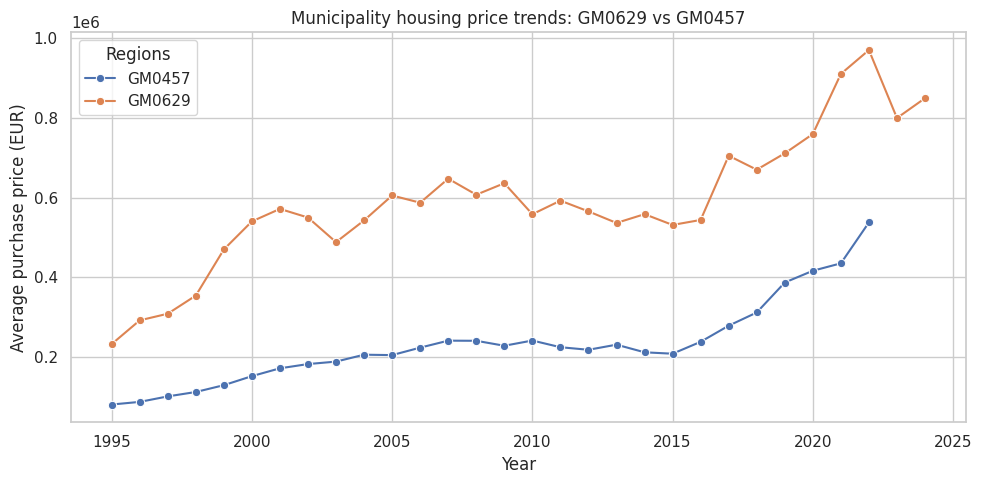

In [ ]:
# Finding the snapshot_year where municipalities have the most non-missing prices
mun = df[df['Region_type'] == 'Municipality'].copy()
counts_by_year = mun.groupby('Year').size().reset_index(name='n')
snapshot_year = int(counts_by_year.sort_values('n', ascending=False).iloc[0]['Year'])
snapshot_year, counts_by_year.head(10)

# Top 15 most expensive & Top 15 cheapest municipalities (at snapshot_year)
mun_snapshot = mun[mun['Year'] == snapshot_year].groupby('Regions', as_index=False)['AveragePurchasePrice_1'].mean()
top15_exp = mun_snapshot.sort_values('AveragePurchasePrice_1', ascending=False).head(15)
top15_cheap = mun_snapshot.sort_values('AveragePurchasePrice_1', ascending=True).head(15)
print("Snapshot year:", snapshot_year)
display(top15_exp)
display(top15_cheap)

# Municipality fastest gainers (using first & last available data per municipality)
mun_first = (
    mun.sort_values('Year')
       .groupby('Regions')
       .first()
       .reset_index()[['Regions', 'Year', 'AveragePurchasePrice_1']]
       .rename(columns={
           'Year': 'first_year',
           'AveragePurchasePrice_1': 'first_price'}))
mun_last = (mun.sort_values('Year')
       .groupby('Regions')
       .last()
       .reset_index()[['Regions', 'Year', 'AveragePurchasePrice_1']]
       .rename(columns={
           'Year': 'last_year',
           'AveragePurchasePrice_1': 'last_price'}))

mun_growth = mun_first.merge(mun_last, on='Regions')
mun_growth = mun_growth[mun_growth['last_year'] > mun_growth['first_year']]

mun_growth['pct_change'] = ((mun_growth['last_price'] - mun_growth['first_price'])/ mun_growth['first_price'] * 100)

top_gainers = mun_growth.sort_values('pct_change', ascending=False).head(10)

display(top_gainers)

# Comparing fastest growing v/s expensive municipality
# Select two example municipalities
mun1 = top15_exp['Regions'].iloc[0]     # most expensive
mun2 = top_gainers['Regions'].iloc[0]  # fastest-growing
mun_subset = mun[mun['Regions'].isin([mun1, mun2])]

mun_ts = (mun_subset
    .groupby(['Year', 'Regions'], as_index=False)
    ['AveragePurchasePrice_1']
    .mean())

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=mun_ts,
    x='Year',
    y='AveragePurchasePrice_1',
    hue='Regions',
    marker='o')
plt.title(f'Municipality housing price trends: {mun1} vs {mun2}')
plt.ylabel('Average purchase price (EUR)')
plt.tight_layout()
plt.show()






**Key takeaways**


1. *Long-term national trend*

Dutch house prices increased substantially over the last 30 years, with prices rising multiple times compared to the mid-1990s.

The national trend shows three distinct phases:
strong growth until ~2008,
stagnation/decline after the financial crisis,
renewed and accelerated growth from ~2013 onward.

This confirms that housing prices are cyclical, but the long-term direction has been clearly upward.


2.  *Regional differences persist*

Macroregions and provinces follow the national trend but at different price levels and growth speeds.

Even when overall trends are similar, regional gaps remain, indicating that location continues to play a major role in housing affordability.

3. *Provinces differ in growth and stability*

Some provinces experienced faster long-term growth than others, while a few showed higher volatility in prices over time.

This highlights that higher growth often comes with higher variability, an important consideration for buyers and policymakers.

4. *Municipality-level prices show the strongest heterogeneity*

Municipality-level analysis reveals very large differences in absolute price levels.

In the snapshot year with the best data coverage, the gap between the most expensive and cheapest municipalities is substantial.

This confirms that national or provincial averages can mask local housing market realities.

5. *Growth leaders are not always the most expensive municipalities*

Several municipalities with lower initial price levels experienced the fastest percentage growth over their available time span.

Conversely, traditionally expensive municipalities tend to remain expensive but often grow more steadily rather than explosively.

6. *Price level and growth tell different stories*

Comparing a high-price municipality with a fast-growing municipality shows clearly different long-term trajectories:

one reflects established, high-value markets,

the other reflects emerging or rapidly developing areas.

This demonstrates why it is important to analyze both price levels and growth dynamics, not just one metric.